# Classification using Logistic algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('D8data1.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

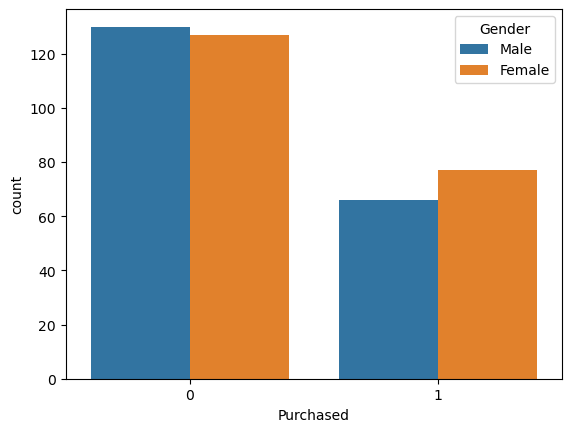

In [8]:
#EDA
sns.countplot(x= data['Purchased'],hue=data['Gender'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_39500\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

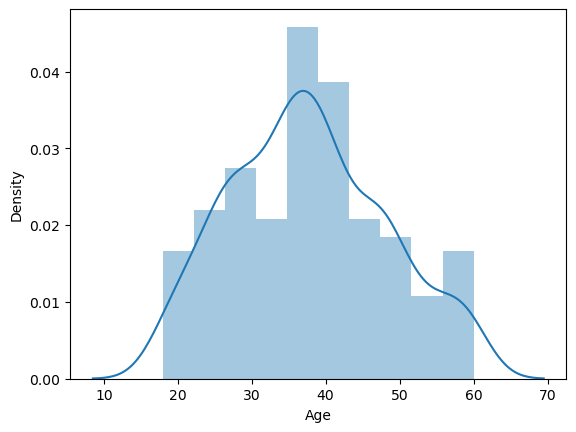

In [9]:
sns.distplot(data['Age'])

<Axes: ylabel='Density'>

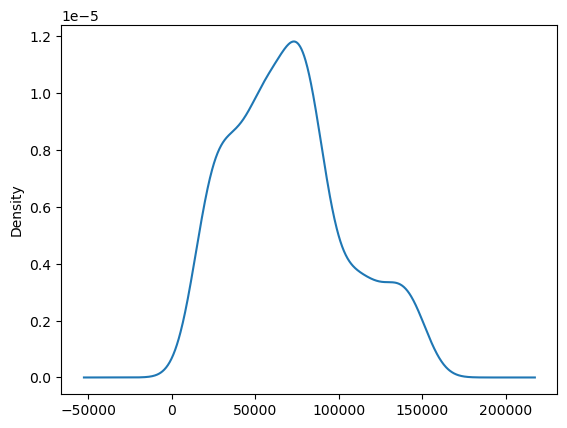

In [10]:
data['EstimatedSalary'].plot(kind='kde')

In [11]:
#Independent variable
X = data[['Age','EstimatedSalary']]

In [12]:
#Dependent variable
y = data['Purchased']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
X_train

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [17]:
X_test

array([[-0.64807267,  0.53080315],
       [ 0.07535729, -0.59737588],
       [-0.19592895,  0.16490725],
       [-0.64807267,  0.28687255],
       [-0.19592895, -0.59737588],
       [-0.9193589 , -1.51211563],
       [-0.55764392, -1.66457226],
       [-0.1055002 ,  2.26880869],
       [-1.7332176 , -0.04853203],
       [ 0.88921599, -0.81081516],
       [-0.64807267, -0.6278672 ],
       [-0.82893016, -0.44491925],
       [-0.01507146, -0.44491925],
       [ 0.16578603,  0.2258899 ],
       [-1.55236011,  0.50031183],
       [-0.46721518,  1.44554291],
       [-0.01507146,  0.2258899 ],
       [-1.64278886,  0.4698205 ],
       [ 1.61264594,  1.84193014],
       [-0.19592895, -1.45113298],
       [-0.19592895, -0.68884985],
       [ 0.88921599,  2.26880869],
       [ 0.34664352, -0.56688455],
       [ 0.88921599,  1.07964701],
       [-1.28107388, -1.26818503],
       [ 1.07007347,  2.17733471],
       [-0.82893016,  0.53080315],
       [-0.73850141,  0.31736388],
       [-0.01507146,

# Model building with Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
#Prediction
prediction = model.predict(X_test)

In [20]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [21]:
#Checking the performance of the matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
#Confusion matrix
print(confusion_matrix(y_test,prediction))

[[75  4]
 [ 9 32]]


In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120



In [28]:
print(accuracy_score(y_test,prediction))

0.8916666666666667


# Model building with k-NN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
knn_predictions = knn_model.predict(X_test)

In [32]:
knn_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [34]:
#Evaluate the performance of kNN model
print(confusion_matrix(y_test,knn_predictions))

[[72  7]
 [ 4 37]]


In [35]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



In [37]:
print(accuracy_score(y_test,knn_predictions))

0.9083333333333333
